# Exploring the Effect of Sampling Rate and Sample Length on DFT Resolution

In this notebook, we explore the effect of sampling rate and sample length on the resolution of DFT analysis.

We start by setting our time step `n` to 0.05, which corresponds to a sampling rate (SR) of 20 Hz, and our total time length `t_max` to 2 seconds. We use one sine wave with a frequency of 5 Hz as an example.

As stated in the printout, our total number of sampling points is 40, which is calculated by dividing the total time (2 seconds) by the time step (0.05 seconds). The Nyquist frequency in our setting is 10 Hz, which is the maximum frequency that can be accurately sampled.

In the DFT plot, we see that -10 Hz and 10 Hz are the lower and upper boundaries, respectively. This means our total frequency resolution is 0.5 Hz. This resolution is determined by dividing the total bandwidth (20 Hz, from -10 Hz to 10 Hz) by the number of sampling points (40).

## How to Increase Frequency Resolution

To increase the frequency resolution, we need to consider two factors: sampling rate and total time length.

- **Increasing the Sampling Rate:** If we increase the sampling rate by reducing the time step, for example, setting `n = 0.025` (which doubles the sampling rate to 40 Hz), we can analyze higher frequencies up to the new Nyquist frequency of 20 Hz. However, the smallest frequency resolution step remains 0.5 Hz because the total number of sampling points still divides the total bandwidth.

- **Increasing the Total Time Length:** To improve the frequency resolution, we need to increase the total time length. For instance, by doubling `t_max` to 4 seconds, we double the number of sampling points to 80. This increases the frequency resolution to 0.25 Hz steps because the total bandwidth (20 Hz) is now divided by 80 sampling points.

In summary, to achieve finer frequency resolution in DFT analysis, extending the total time length of the sampled signal is more effective than merely increasing the sampling rate. This approach provides more data points for the DFT to process, resulting in smaller frequency resolution steps.


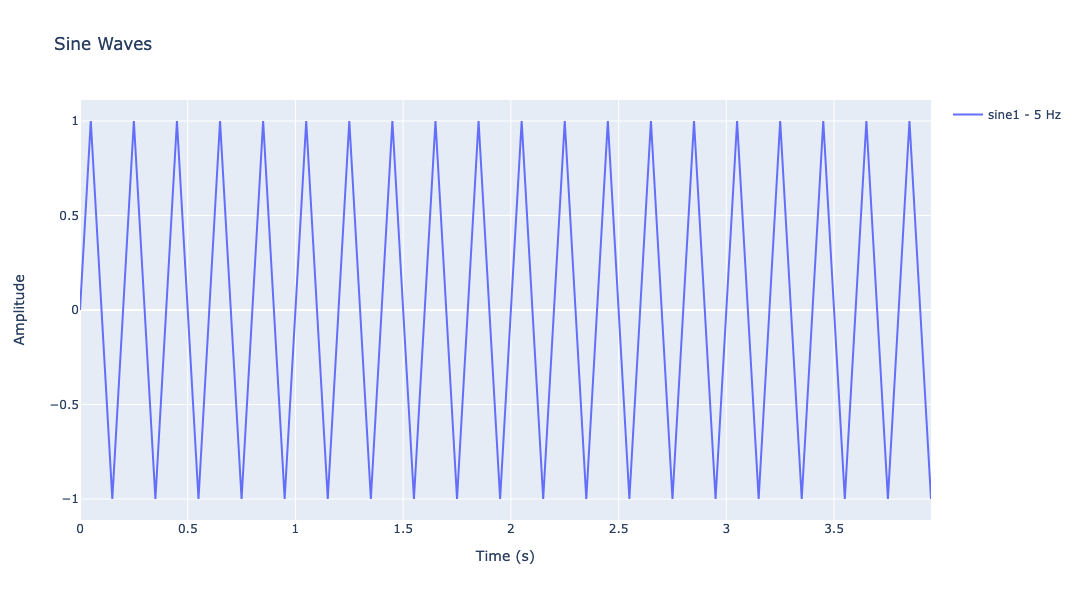

Sampling rate: 20.0 Hz
Nyquist frequency: 10.0 Hz
Total number of available sample points: 80
Frequency Resolution: 0.25 Hz


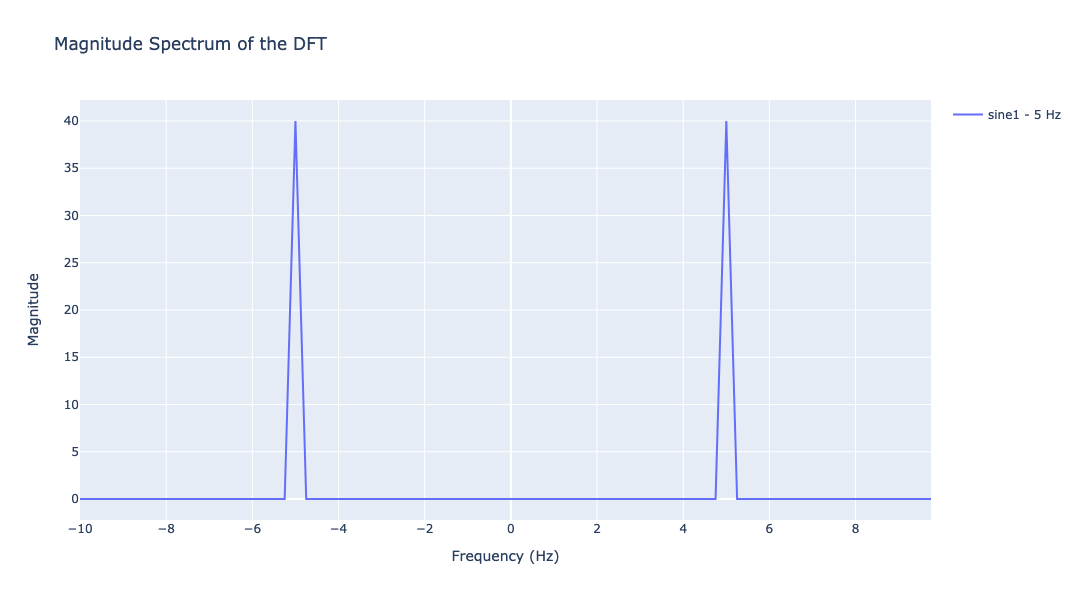

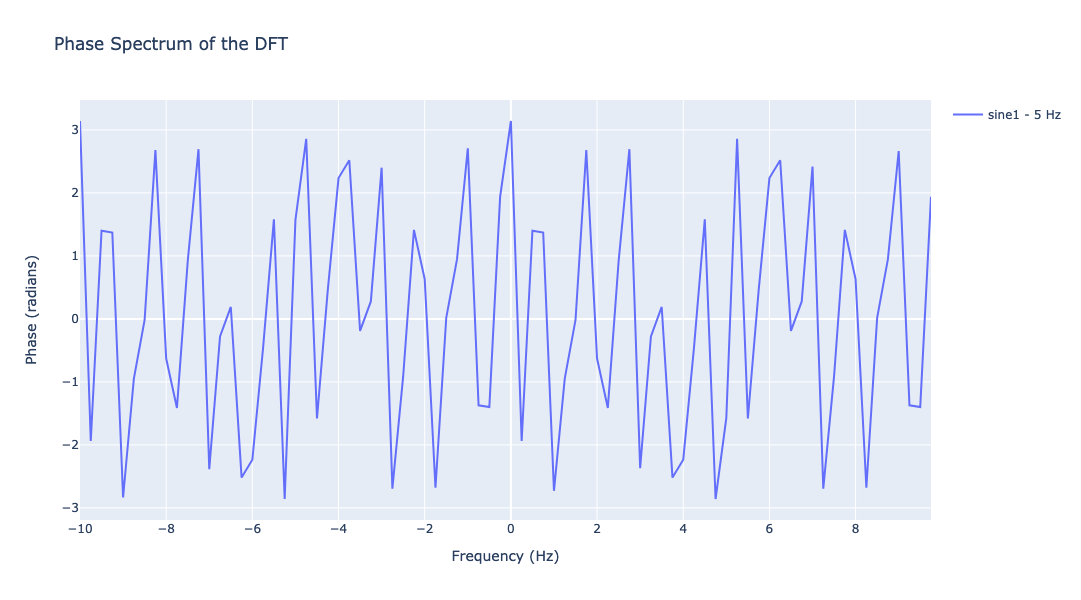

In [4]:
import sys
sys.path.append('../')

import numpy as np
import plotly.graph_objects as go
from py_scripts.waveform_utils import generate_waveforms, apply_window_to_waveforms, plot_waveforms

config = {
    # Time step in seconds
    'n': 0.05, 
    
    # Maximum time
    't_max': 4.0, 
    
    # Waveforms to show as list: 'sine1', 'sine2', 'am', 'fm', 'sum', 'comb'
    'selected_waveforms': ['sine1'],
    
    # Parameters for sine wave 1: amp, freq, phase
    'amp1': 1.0, 'freq1': 5, 'phase1': 0*np.pi,
    
    # Parameters for sine wave 2: amp, freq, phase
    'amp2': 1.0, 'freq2': 15, 'phase2': 0*np.pi,
    
    # Set the modulation index for AM
    'index_am': 1,
    
    # Set the modulation index for FM
    'index_fm': 0.1,
    
    # Apply window function
    'apply_window': False,
    
    # Type of window function to apply. Reference here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html
    'window_type': 'blackman',
    
    # Add dotted lines overlay (disable if using high SR!)
    'add_dotted_lines': False
}

waveform_data, t = generate_waveforms(config)

if config['apply_window']:
    waveform_data = apply_window_to_waveforms(waveform_data, t, config['window_type'])

plot_waveforms(waveform_data, t, config)